In [6]:
df = pd.read_csv("Churn_Modelling.csv")

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
 df.duplicated().sum()

np.int64(0)

In [11]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [14]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# # encoding the categorical columns through one hot encoding
# pd.get_dummies(df,columns= ["Geography"	,"Gender"],drop_first=True)

In [17]:
pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True).astype(int)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [18]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True).astype(int)

In [19]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [20]:
X = df.drop(columns = ["Exited"]) #input cols
y = df["Exited"] # output cols
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state = 1)

In [21]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363,1,1,1,66799,1,0,1
7813,684,63,3,81245,1,1,0,69643,1,0,0
905,672,45,9,0,1,1,1,92027,0,0,0
5192,663,39,8,0,2,1,1,101168,0,0,0


In [22]:
y_test

,Exited
9953,0
3850,0
4962,0
3886,0
5437,0
...,...
3919,0
162,0
7903,0
2242,0


In [23]:
X_train.shape

(8000, 11)

# Scaling the Data
Data scaling is essential in many scenarios to ensure that your machine learning models or statistical analyses work effectively and yield accurate results. The goal is to adjust the values of features so they have comparable ranges, making the computations more efficient and meaningful.
Why Do We Need It?
- Feature Comparison: In datasets, features often have varying scales. For example, age might range from 0 to 100, while income could be in thousands or millions. Without scaling, algorithms can give undue importance to larger values.
- Improve Model Performance: Many machine learning algorithms (like gradient descent-based models, SVMs, or k-means clustering) are sensitive to feature magnitudes. Scaling ensures these algorithms converge faster and perform better.
- Prevent Bias: Unscaled data can introduce bias, especially in algorithms that calculate distances (like k-nearest neighbors or PCA). A feature with larger values might dominate, undermining others.
- Optimize Neural Networks: When training neural networks, scaled inputs help the model learn more efficiently by avoiding unstable gradients.
- Normalization Across Features: Scaled data improves interpretability, especially when comparing coefficients in linear regression.




In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. **Importing StandardScaler**:
   - The `StandardScaler` applies standardization to your data by removing the mean and scaling to unit variance (i.e., making the mean 0 and the standard deviation 1).

2. **Creating the Scaler Object**:
   ```python
   scaler = StandardScaler()
   ```
   - This initializes the scaler. No transformation happens yet; it's just preparing the tool.

3. **Scaling the Training Data**:
   ```python
   X_train_scaled = scaler.fit_transform(X_train)
   ```
   - The `fit_transform` method performs two operations:
     - **Fit:** Calculates the mean and standard deviation of `X_train` (training data).
     - **Transform:** Uses these calculated values to standardize the training data.

4. **Scaling the Test Data**:
   ```python
   X_test_scaled = scaler.transform(X_test)
   ```
   - The `transform` method applies the scaling parameters (mean and standard deviation) calculated during `fit` on the training data to the test data. **Note:** You don’t use `fit_transform` here because you don’t want to recompute the scaling parameters from the test data—it ensures consistency.

### Why is this approach important?
Separating the scaling process for training and test data (i.e., fitting only on `X_train`) avoids **data leakage**, ensuring your test data remains truly unseen during training. This is critical for building reliable machine learning models.

Let me know if you'd like a more detailed walkthrough or assistance with implementing this!

Recomputing scaling parameters on the test data would essentially allow the test data to influence the scaling process, which could lead to **data leakage**. Data leakage occurs when information from the test data, which is meant to simulate unseen data, is inadvertently used in the training process. This undermines the purpose of having a separate test set and can result in overly optimistic model performance metrics.

By using only `transform` on the test set, you ensure that the scaling is based solely on the training data, maintaining the integrity of the evaluation process. This is a critical step in creating reliable and fair machine learning models.

Would you like a deeper dive into other best practices for avoiding data leakage or improving model evaluation?

In [25]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [26]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(11,activation = "relu",input_dim = 11))
model.add(Dense(11,activation = "relu"))# added one more layer
model.add(Dense(1,activation = "sigmoid")) #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#model Compilation

In [54]:
model.compile(loss="binary_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [55]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7839 - loss: 0.5561 - val_accuracy: 0.7956 - val_loss: 0.4741
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4550 - val_accuracy: 0.8056 - val_loss: 0.4475
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4224 - val_accuracy: 0.8062 - val_loss: 0.4340
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.4272 - val_accuracy: 0.8112 - val_loss: 0.4220
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.4044 - val_accuracy: 0.8231 - val_loss: 0.4031
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8362 - loss: 0.3931 - val_accuracy: 0.8331 - val_loss: 0.3849
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3782 - val_accuracy: 0.8425 - val_loss: 0.3703
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8416 - loss: 0.3695 - val_accu

what does verbose do ?


The verbose parameter controls the amount of information displayed during the training process of your machine learning model. It essentially determines how "talkative" the training process will be. Here's a breakdown of the common values for verbose:

verbose=0: This is the silent mode. The training process will run without displaying any progress or information to the console. It's useful when you want to train models in the background or as part of a larger script without cluttering the output.

verbose=1: This is the progress bar mode. It displays a progress bar indicating the progress of each epoch during training. You'll typically see information about the loss and metrics (e.g., accuracy) for each epoch. This is the default setting in many machine learning libraries and is helpful for monitoring training progress

verbose=2: This is the one line per epoch mode. It prints a single line of information for each epoch, showing the epoch number, loss, and metrics. It provides less visual feedback than the progress bar but can be useful for logging training details in a more concise format.

In simpler terms:

Think of verbose as a control for how much your model wants to tell you about what it's doing while it's learning.

verbose=0: The model is completely silent and doesn't give you any updates.
verbose=1: The model shows you a progress bar, like a loading bar on a website, so you can see how far along it is in the training process.
verbose=2: The model gives you a short update after each round of learning, telling you how well it's doing.

In [44]:
# our weigts and biases of layer-0

model.layers[0].get_weights()

[array([[-3.5791990e-01, -8.5078821e-02, -5.8082499e-02,  4.5155433e-01,
          9.4350345e-02, -2.0025526e-01,  1.2886739e-01, -1.6798072e-01,
          6.7997736e-01, -6.1474639e-01, -3.0479312e-01],
        [-6.0681462e-02,  8.1377214e-01, -7.7200431e-01,  6.2004954e-01,
          2.3868397e-01,  9.3501884e-01,  2.0121109e-01,  2.7056983e-01,
         -1.4199290e-01, -2.8450325e-01,  6.5024906e-01],
        [ 4.4285616e-01, -2.9615730e-01, -1.0007680e-01,  4.2355055e-01,
         -3.5003805e-01,  1.1270130e-01,  1.3406254e-01,  1.2110143e-01,
         -4.3025172e-01,  4.9345329e-01, -4.3765157e-01],
        [-6.7922890e-01,  1.5242191e-01, -3.4386579e-02,  2.5082296e-02,
         -8.5892314e-01,  7.5626686e-02,  3.1165490e-01, -5.9059525e-01,
          2.1327092e-01,  2.8906661e-01,  2.7890542e-01],
        [ 1.4530785e-01, -6.5900594e-01, -6.0508102e-01, -5.8958679e-01,
         -2.4585909e-01,  1.1432189e+00, -9.2887717e-01, -9.4413543e-01,
          5.2052152e-01,  3.6050111e-0

In [45]:
# weight and biases of layer -1
model.layers[1].get_weights()

[array([[-4.84353513e-01, -5.09106278e-01, -1.11482993e-01,
         -9.08261016e-02, -7.61883974e-01, -5.02674282e-02,
          6.16363645e-01,  3.52260590e-01,  2.84489065e-01,
         -1.98673725e-01,  2.41182521e-01],
        [ 4.22754765e-01, -1.07453525e+00,  3.01660806e-01,
         -3.74013156e-01, -4.34451044e-01,  3.52631509e-02,
         -4.28549588e-01, -1.03042079e-02,  1.14362419e-01,
          3.11678667e-02,  3.66240650e-01],
        [-2.53098905e-01, -9.58840176e-02,  1.09435409e-01,
         -3.27301532e-01,  3.90762299e-01, -2.47029662e-01,
         -3.22601616e-01,  3.02466512e-01, -1.29680052e-01,
         -1.01233029e+00, -8.25918019e-02],
        [-2.37306073e-01,  2.83394456e-02,  7.83742428e-01,
         -8.66667703e-02, -3.60806316e-01, -1.99713811e-01,
         -3.30299973e-01,  2.91001350e-01, -4.91951555e-02,
          4.53265190e-01, -3.03909063e-01],
        [ 4.05104458e-01,  1.54101968e-01, -1.85734585e-01,
          2.44636893e-01,  1.78435355e-01,  

In [50]:
model.layers[2].get_weights()

[array([[ 0.78442276],
        [ 1.4546485 ],
        [-0.8155459 ],
        [ 0.6262545 ],
        [-0.82288414],
        [-1.1576786 ],
        [-0.64035016],
        [-0.5683982 ],
        [-0.9054502 ],
        [ 1.2378151 ],
        [ 0.7191846 ]], dtype=float32),
 array([-0.1235128], dtype=float32)]

In [46]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.0301393 ],
       [0.13384335],
       [0.04254753],
       ...,
       [0.00795401],
       [0.03595861],
       [0.5382798 ]], dtype=float32)

# the problem is the model output is not 1 or 0 because you are using sigmoid whose output is a probability .

#  So ,we just need to decide a threshold value

In [47]:
 y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
y_pred = np.where(y_log>0.5, 1 ,0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [56]:
import matplotlib.pyplot as plt

In [57]:
history

In [58]:
history.history


{'accuracy': [0.7932812571525574,
  0.8045312762260437,
  0.817187488079071,
  0.8221874833106995,
  0.831250011920929,
  0.8392187356948853,
  0.8473437428474426,
  0.8517187237739563,
  0.8542187213897705,
  0.8582812547683716,
  0.858593761920929,
  0.8607812523841858,
  0.8607812523841858,
  0.8589062690734863,
  0.8623437285423279,
  0.8609374761581421,
  0.8618749976158142,
  0.8612499833106995,
  0.8623437285423279,
  0.8621875047683716,
  0.8628125190734863,
  0.864062488079071,
  0.864062488079071,
  0.8637499809265137,
  0.864062488079071,
  0.86328125,
  0.8642187714576721,
  0.8634374737739563,
  0.8635937571525574,
  0.864062488079071,
  0.8657812476158142,
  0.8642187714576721,
  0.8646875023841858,
  0.8623437285423279,
  0.8639062643051147,
  0.8646875023841858,
  0.8642187714576721,
  0.8634374737739563,
  0.8634374737739563,
  0.8650000095367432,
  0.8646875023841858,
  0.8645312786102295,
  0.8634374737739563,
  0.8646875023841858,
  0.866406261920929,
  0.8665624856

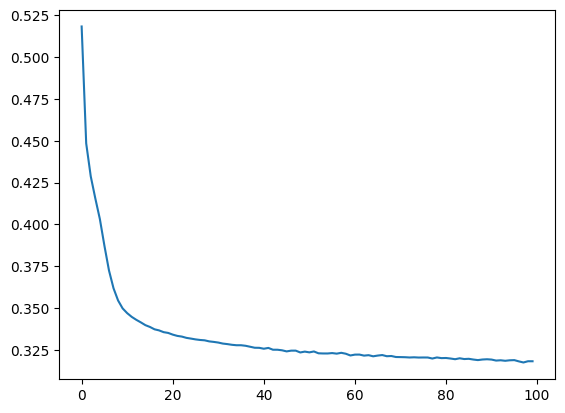

In [59]:
plt.plot(history.history["loss"])

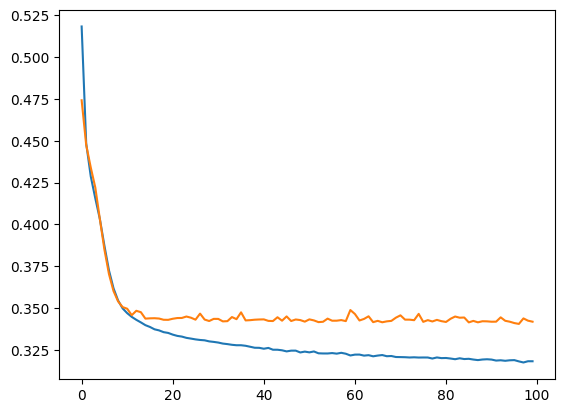

In [60]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

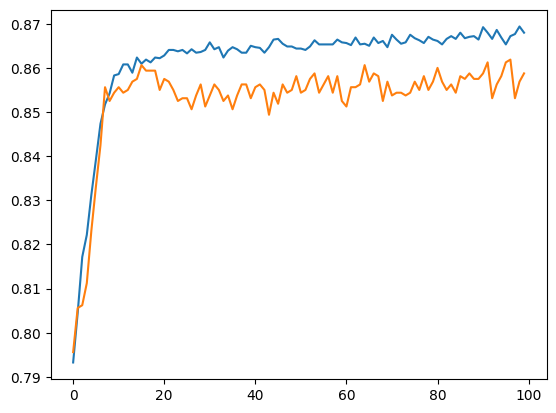

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])